<a href="https://colab.research.google.com/github/varuncode01/ST_Online_Retail_Project5/blob/main/ML_Project5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name** - **Online Retail Clustering Project**


##### **Project Type**    - Clustering
##### **Contribution**    - Individual
##### **Name** - Varun Pal

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

https://github.com/varuncode01/ST_Project5.git

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [4]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [44]:
# Load Dataset
df = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Online_Retail_Project5/Copy of Online Retail.xlsx")

### Dataset First View

In [154]:
# Dataset First Look
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


### Dataset Rows & Columns count

In [93]:
# Dataset Rows & Columns count
df.shape

(541909, 8)

### Dataset Information

In [94]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


#### Duplicate Values

In [95]:
# Dataset Duplicate Value Count
df.duplicated().sum()

np.int64(5268)

#### Missing Values/Null Values

In [96]:
# Missing Values/Null Values Count
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


<Axes: >

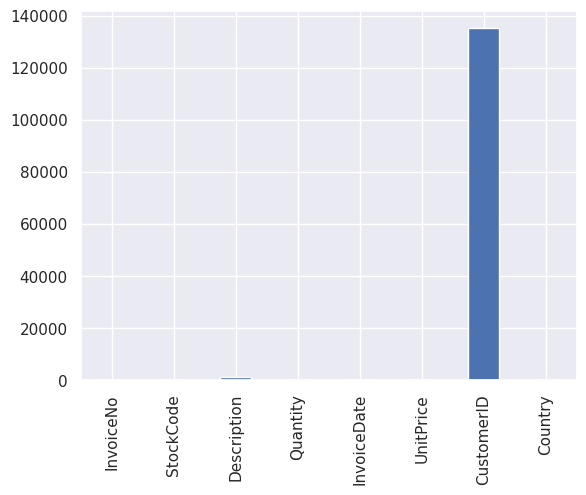

In [97]:
# Visualizing the missing values
df.isnull().sum().plot.bar()

### What did you know about your dataset?

CustomerID has more 20% null values

## ***2. Understanding Your Variables***

In [98]:
# Dataset Columns
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [99]:
# Dataset Describe
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Quantity,541909.0,9.55225,-80995.0,1.0,3.0,10.0,80995.0,218.081158
InvoiceDate,541909,2011-07-04 13:34:57.156386048,2010-12-01 08:26:00,2011-03-28 11:34:00,2011-07-19 17:17:00,2011-10-19 11:27:00,2011-12-09 12:50:00,NaN
UnitPrice,541909.0,4.611114,-11062.06,1.25,2.08,4.13,38970.0,96.759853
CustomerID,406829.0,15287.69057,12346.0,13953.0,15152.0,16791.0,18287.0,1713.600303


### Variables Description

InvoiceNo: A unique identifier for each transaction (order). If it starts with 'C', it indicates a canceled order.

StockCode: A unique product/item code for the specific stock being purchased.
Description	Text description of the product/item.

Quantity:	Number of units of the product ordered. Negative values may indicate returns.

InvoiceDate:	Date and time when the invoice was generated (i.e., when the transaction occurred).

UnitPrice:	Price per unit of the product (in GBP – British Pounds).

CustomerID:	A unique identifier for the customer. Missing values may indicate guest or anonymous purchases.

Country:	Name of the country where the customer resides or where the order was placed.


### Check Unique Values for each variable.

In [100]:
# Check Unique Values for each variable.
df.nunique()

,0
InvoiceNo,25900
StockCode,4070
Description,4223
Quantity,722
InvoiceDate,23260
UnitPrice,1630
CustomerID,4372
Country,38


## 3. ***Data Wrangling***

### Data Wrangling Code

In [101]:
# Write your code to make your dataset analysis ready.
df['CustomerID'].dropna(inplace=True)

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

<Axes: ylabel='Quantity'>

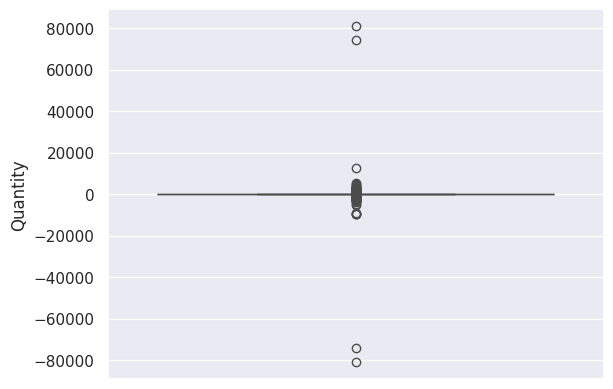

In [ ]:
# Chart - 1 visualization code
sns.boxplot(df['Quantity'])

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

<Axes: >

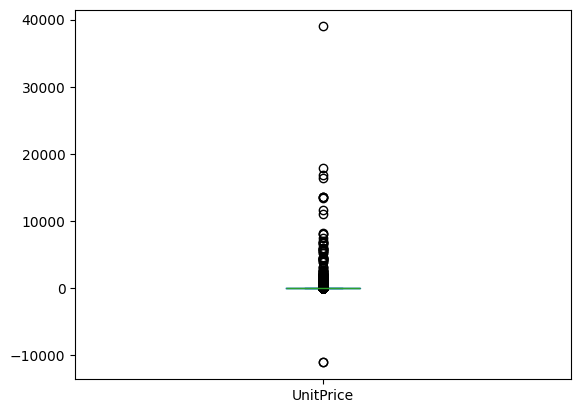

In [ ]:
# Chart - 2 visualization code
df['UnitPrice'].plot(kind='box')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

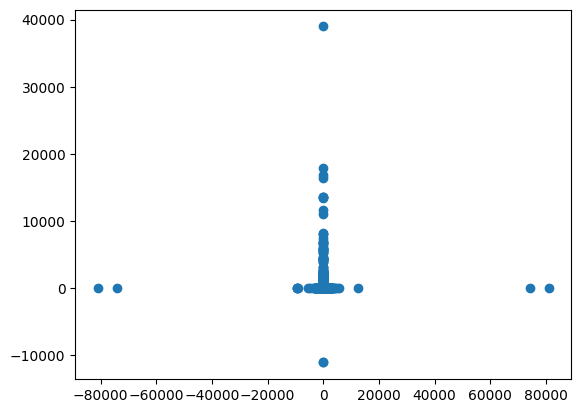

In [ ]:
# Chart - 3 visualization code
plt.scatter(df['Quantity'], df['UnitPrice'])

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

<Axes: xlabel='Country'>

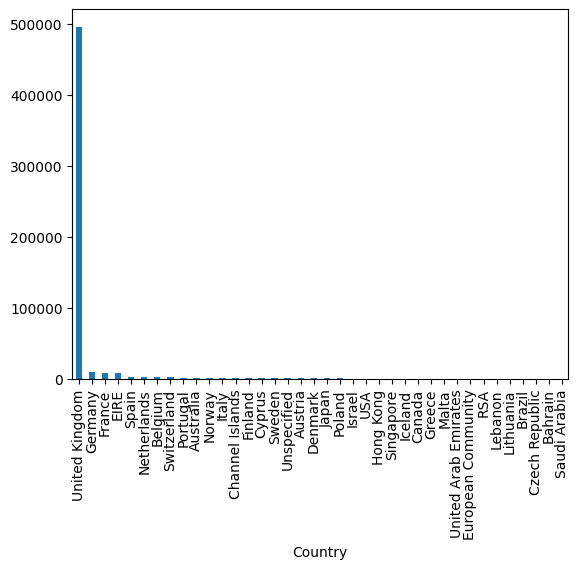

In [ ]:
# Chart - 4 visualization code
df['Country'].value_counts().plot(kind='bar')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

<Axes: xlabel='StockCode'>

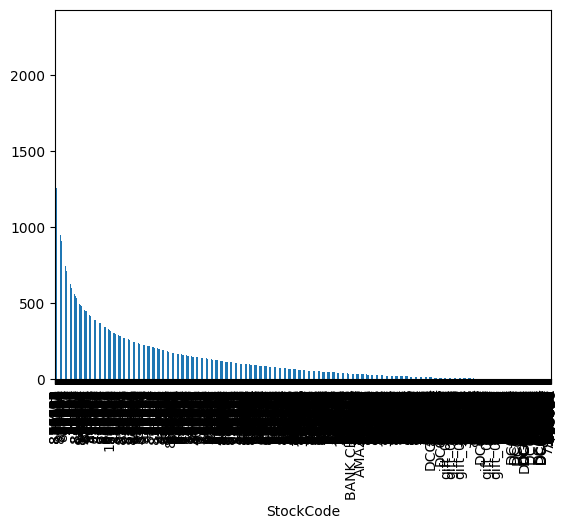

In [ ]:
# Chart - 5 visualization code
df['StockCode'].value_counts().plot(kind='bar')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

<Axes: xlabel='InvoiceMonth', ylabel='count'>

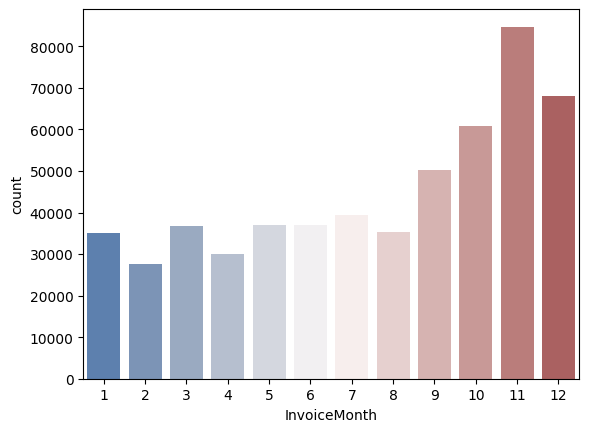

In [ ]:
# Chart - 6 visualization code
#df['InvoiceMonth'].value_counts().plot(kind='bar')
#data = df['InvoiceMonth'].value_counts()
sns.barplot(df['InvoiceMonth'].value_counts(), palette='vlag')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

<Axes: xlabel='InvoiceDayofWeek', ylabel='count'>

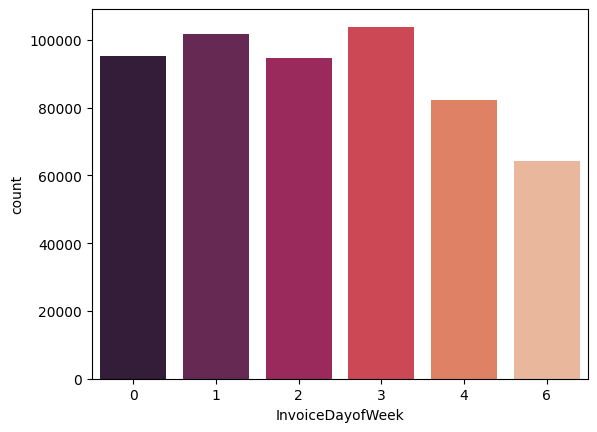

In [ ]:
# Chart - 7 visualization code
sns.barplot(df['InvoiceDayofWeek'].value_counts(), palette='rocket')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

<Axes: xlabel='InvoiceHour', ylabel='count'>

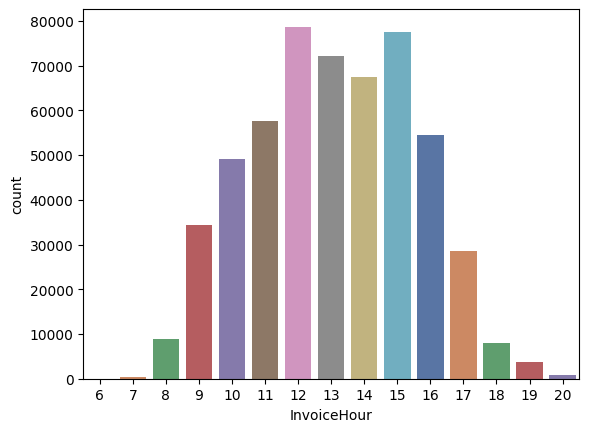

In [ ]:
# Chart - 8 visualization code
sns.barplot(df['InvoiceHour'].value_counts(), palette='deep')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

<Axes: xlabel='IsCancelled', ylabel='count'>

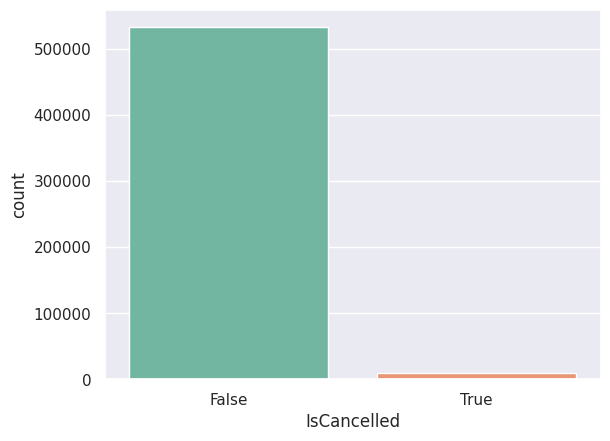

In [107]:
# Chart - 9 visualization code
df['IsCancelled'] = df['InvoiceNo'].astype(str).str.startswith('C')
sns.countplot(x='IsCancelled', data=df, palette='Set2')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDay,InvoiceMonth,InvoiceHour,InvoiceDayofWeek
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,12,8,2
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,12,8,2
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,12,8,2
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,12,8,2
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,12,8,2
...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011-12-09,12,12,4
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011-12-09,12,12,4
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-09,12,12,4
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-09,12,12,4


In [ ]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'InvoiceDay', 'InvoiceMonth',
       'InvoiceHour', 'InvoiceDayofWeek'],
      dtype='object')

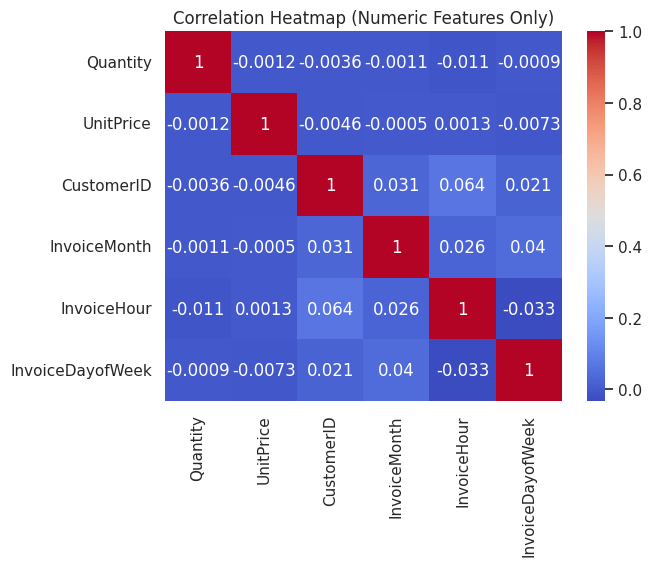

In [ ]:
# Correlation Heatmap visualization code
df2 = df.drop(['StockCode', 'InvoiceNo', 'Description', 'Country', 'InvoiceDate'], axis=1)
df2_numeric = df2.select_dtypes(include='number')
sns.heatmap(df2_numeric.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

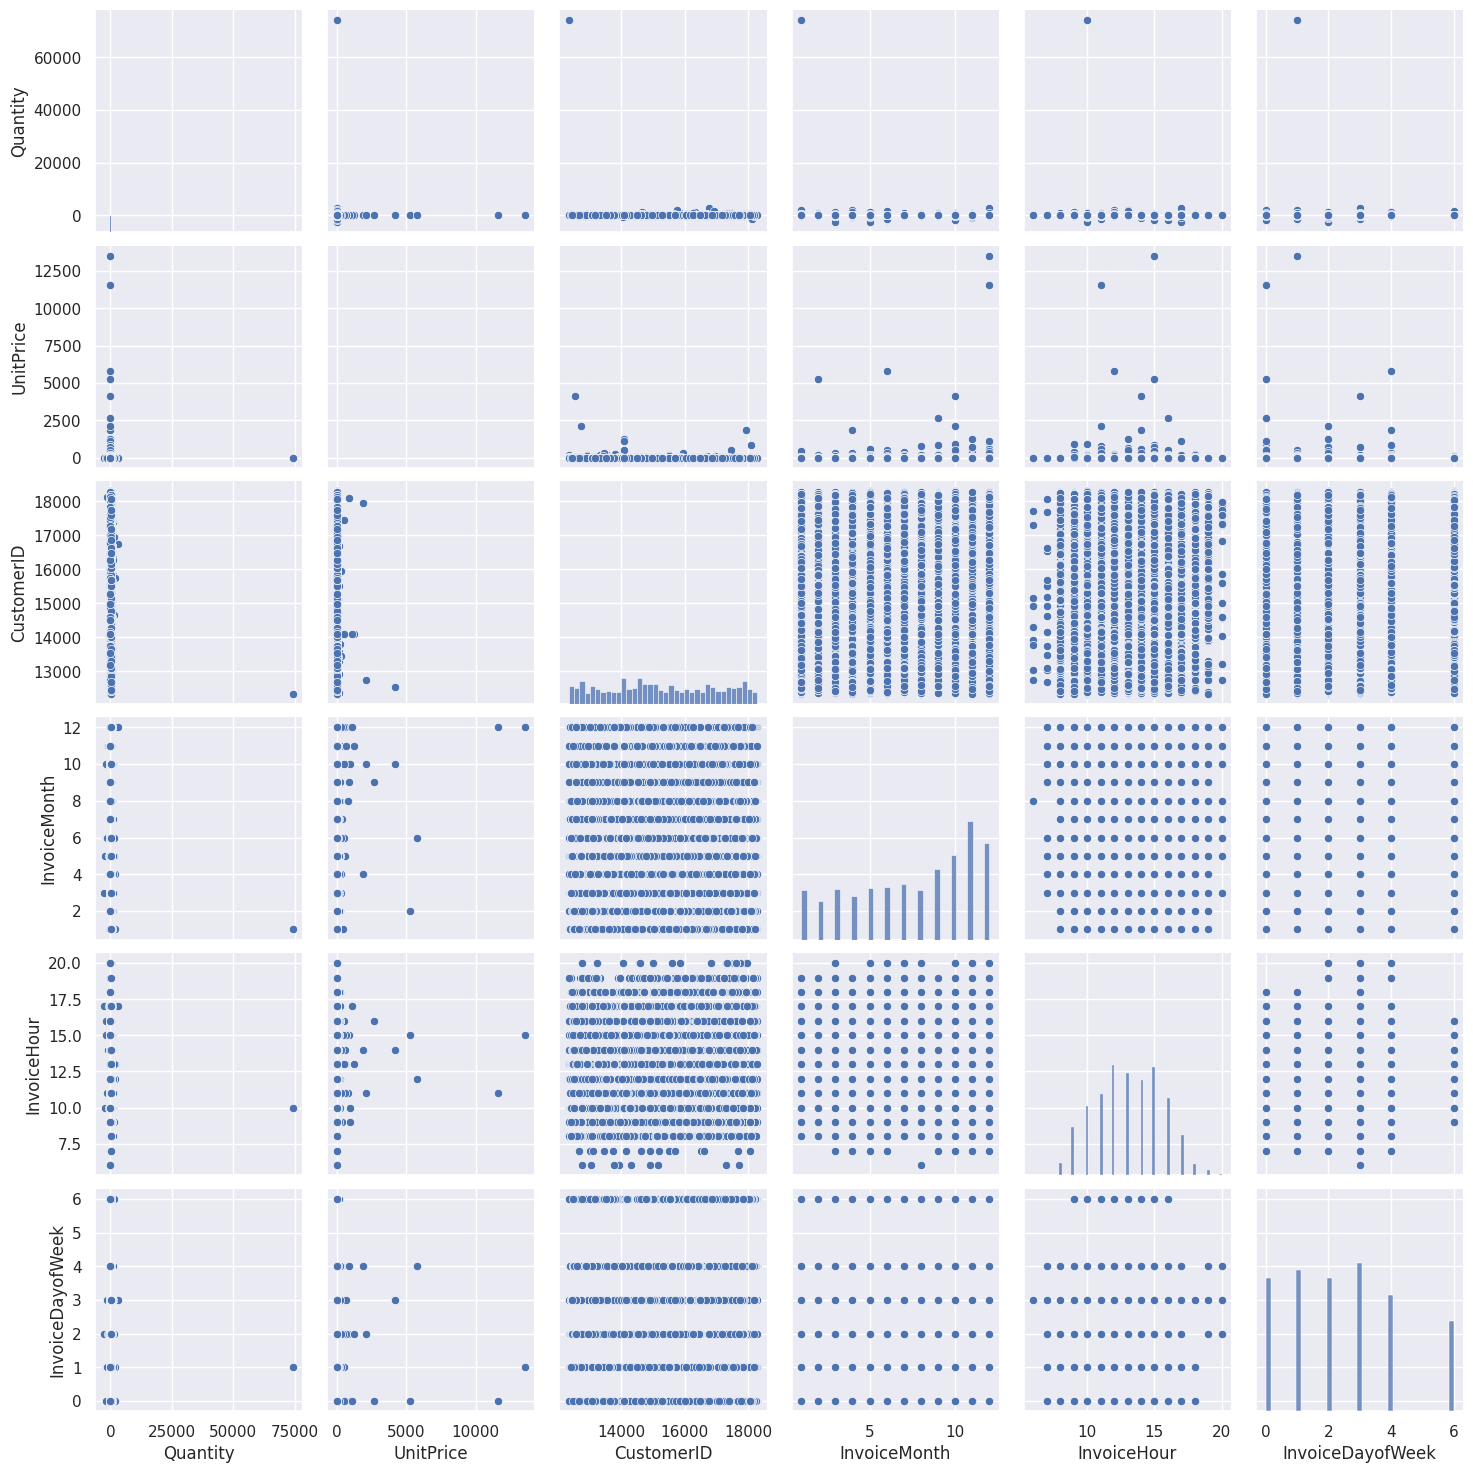

In [ ]:
# Pair Plot visualization code
df_sample = df2_numeric.sample(n=50000, random_state=42)

sns.pairplot(df_sample, diag_kind="hist")

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***6. Feature Engineering & Data Pre-processing**

### 1. Handling Missing Values

In [46]:
# Handling Missing Values & Missing Value Imputation
df = df.drop('CustomerID', axis=1)
df = df.dropna(subset=['Description'])

In [47]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
Country,0
InvoiceMonth,0
InvoiceHour,0
InvoiceDayofWeek,0


#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

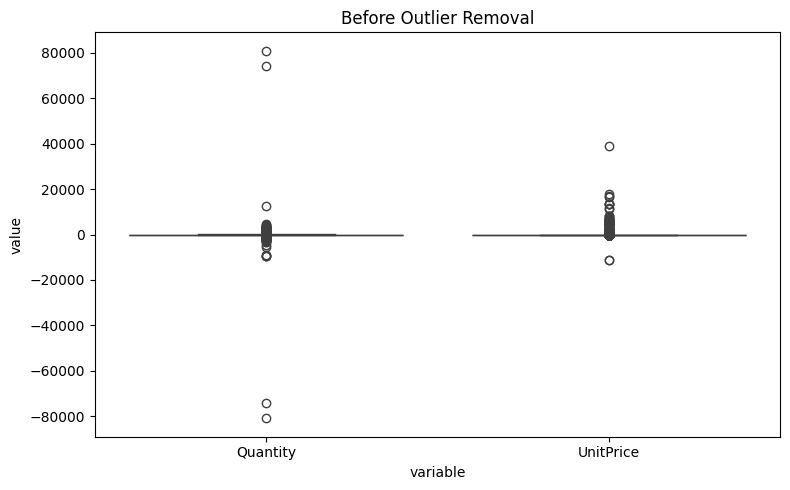

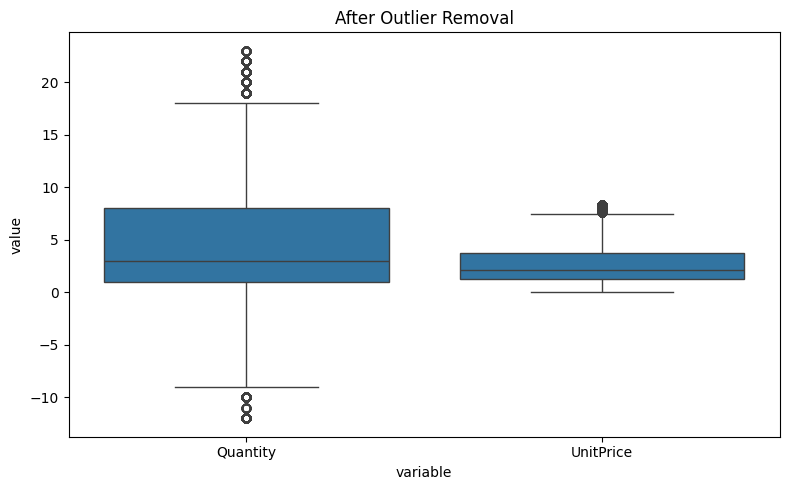

In [48]:
# Handling Outliers & Outlier treatments
# Handling Outliers & Outlier treatments

# Define the columns of interest
cols_to_check = [
    'Quantity',
    'UnitPrice'
]

# Calculate IQR for each
Q1 = df[cols_to_check].quantile(0.25)
Q3 = df[cols_to_check].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers in only these columns
outlier_mask = (df[cols_to_check] < (Q1 - 1.5 * IQR)) | (df[cols_to_check] > (Q3 + 1.5 * IQR))

# Filter out rows with outliers in either of the two columns
df_cleaned = df[~outlier_mask.any(axis=1)]

# -----------------------------
# Boxplot before outlier removal
# -----------------------------
df_before = df[cols_to_check].melt(var_name='variable', value_name='value')
plt.figure(figsize=(8, 5))
sns.boxplot(x='variable', y='value', data=df_before)
plt.title("Before Outlier Removal")
plt.tight_layout()
plt.show()

# -----------------------------
# Boxplot after outlier removal
# -----------------------------
df_after = df_cleaned[cols_to_check].melt(var_name='variable', value_name='value')
plt.figure(figsize=(8, 5))
sns.boxplot(x='variable', y='value', data=df_after)
plt.title("After Outlier Removal")
plt.tight_layout()
plt.show()

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
!pip install contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.1/345.1 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.9/113.9 kB 8.5 MB/s eta 0:00:00


In [13]:
import contractions

In [49]:
# Expand Contraction
df['Description'] = df['Description'].astype(str).apply(contractions.fix)

In [50]:
df['Description']

,Description
0,WHITE HANGING HEART T-LIGHT HOLDER
1,WHITE METAL LANTERN
2,CREAM CUPID HEARTS COAT HANGER
3,KNITTED UNION FLAG HOT WATER BOTTLE
4,RED WOOLLY HOTTIE WHITE HEART.
...,...
541904,PACK OF 20 SPACEBOY NAPKINS
541905,CHILDREN'S APRON DOLLY GIRL
541906,CHILDRENS CUTLERY DOLLY GIRL
541907,CHILDRENS CUTLERY CIRCUS PARADE


#### 2. Lower Casing

In [51]:
# Lower Casing
df['Description'] = df['Description'].str.lower()
df['Country'] = df['Country'].str.lower()

In [52]:
df[['Country', 'Description']]

,Country,Description
0,united kingdom,white hanging heart t-light holder
1,united kingdom,white metal lantern
2,united kingdom,cream cupid hearts coat hanger
3,united kingdom,knitted union flag hot water bottle
4,united kingdom,red woolly hottie white heart.
...,...,...
541904,france,pack of 20 spaceboy napkins
541905,france,children's apron dolly girl
541906,france,childrens cutlery dolly girl
541907,france,childrens cutlery circus parade


#### 3. Removing Punctuations

In [18]:
import string
import re

In [53]:
# Remove Punctuations
df['Description'] = df['Description'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x.lower()))

#### 4. Removing URLs & Removing words and digits contain digits.

In [54]:
# Remove URLs & Remove words and digits contain digits
df['Description'].apply(lambda x: re.sub(r'http\S+|www\S+|https\S+', '', x))   # Remove URLs
df['Description'] = df['Description'].apply(lambda x: re.sub(r'\w*\d\w*', '', x))    # Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [22]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [23]:
from nltk.corpus import stopwords

In [55]:
# Remove Stopwords
stop_words = set(stopwords.words('english'))

df['Description'] = df['Description'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

In [56]:
# Remove White spaces
df['Description'] = df['Description'].apply(lambda x: re.sub(r'\s+', ' ', x).strip())

#### 7. Tokenization

In [185]:
#Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [64]:
df_unique_products = df.drop_duplicates(subset='Description')

print(df_unique_products.shape)

(4068, 10)


In [65]:
df_unique_products

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,InvoiceMonth,InvoiceHour,InvoiceDayofWeek
0,536365,85123A,white hanging heart tlight holder,6,2010-12-01 08:26:00,2.55,united kingdom,12,8,2
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,united kingdom,12,8,2
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,united kingdom,12,8,2
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,united kingdom,12,8,2
4,536365,84029E,red woolly hottie white heart,6,2010-12-01 08:26:00,3.39,united kingdom,12,8,2
...,...,...,...,...,...,...,...,...,...,...
514649,579734,84859C,wet,-153,2011-11-30 14:25:00,0.00,united kingdom,11,14,2
532724,580991,22481,wet boxes,-288,2011-12-06 16:55:00,0.00,united kingdom,12,16,1
535329,581206,21693,mixed,-87,2011-12-07 18:34:00,0.00,united kingdom,12,18,2
537621,581334,85123A,cream hanging heart tlight holder,4,2011-12-08 12:07:00,2.95,united kingdom,12,12,3


In [66]:
# Vectorizing Text
vectorizer = TfidfVectorizer(stop_words='english')
Description_tfidf_matrix = vectorizer.fit_transform(df_unique_products['Description'])

# Print shape to confirm
print(Description_tfidf_matrix)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 15927 stored elements and shape (4068, 2196)>
  Coords	Values
  (0, 2141)	0.4422576680082316
  (0, 911)	0.4659060277752003
  (0, 923)	0.3840421715889968
  (0, 2012)	0.48244505724699904
  (0, 952)	0.45508032867813825
  (1, 2141)	0.48696427071355003
  (1, 1211)	0.5206029418197162
  (1, 1079)	0.7013118963892437
  (2, 490)	0.363985253654296
  (2, 518)	0.5381680191076108
  (2, 925)	0.3969555319001593
  (2, 423)	0.48309867934099404
  (2, 909)	0.4323562073624673
  (3, 1061)	0.4647910110689257
  (3, 2084)	0.38834399012852067
  (3, 737)	0.4516801198959535
  (3, 967)	0.3861290202068233
  (3, 2124)	0.3839866854846399
  (3, 195)	0.3641454871009677
  (4, 2141)	0.3189282064103299
  (4, 923)	0.27694687923088124
  (4, 1607)	0.28985793900747825
  (4, 2170)	0.5924739207499675
  (4, 968)	0.621725223604177
  (5, 1736)	0.27500641955092925
  :	:
  (4059, 1407)	0.6094871528231746
  (4060, 1736)	0.267334480512793
  (4060, 1825)	0.6279871897627637
 

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [45]:
# Manipulate Features to minimize feature correlation and create new features
df['InvoiceMonth'] = df['InvoiceDate'].dt.month
df['InvoiceHour'] = df['InvoiceDate'].dt.hour
df['InvoiceDayofWeek'] = df['InvoiceDate'].dt.dayofweek

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [190]:
# Transform Your data
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country
0,536365,85123A,white hanging heart tlight holder,6,2010-12-01 08:26:00,2.55,united kingdom
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,united kingdom
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,united kingdom
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,united kingdom
4,536365,84029E,red woolly hottie white heart,6,2010-12-01 08:26:00,3.39,united kingdom
...,...,...,...,...,...,...,...
541904,581587,22613,pack spaceboy napkins,12,2011-12-09 12:50:00,0.85,france
541905,581587,22899,childrens apron dolly girl,6,2011-12-09 12:50:00,2.10,france
541906,581587,23254,childrens cutlery dolly girl,4,2011-12-09 12:50:00,4.15,france
541907,581587,23255,childrens cutlery circus parade,4,2011-12-09 12:50:00,4.15,france


### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

## ***7. ML Model Implementation***

In [67]:
similarity_matrix = cosine_similarity(Description_tfidf_matrix)

print(similarity_matrix.shape)

(4068, 4068)


### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***